In [136]:
#Markowitz portfolio optimizatiob

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
assets = ['AAPL','TSLA','MRO']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source ='yahoo', start = '2010-8-1')['Adj Close']
    

In [139]:
pf_data.tail()

,AAPL,TSLA,MRO
Date,,,
2020-09-21,110.080002,449.390015,4.5600
2020-09-22,111.809998,424.230011,4.4700
2020-09-23,107.120003,380.359985,4.2100
2020-09-24,108.220001,387.790009,4.3100
2020-09-25,110.184998,401.850006,4.1383


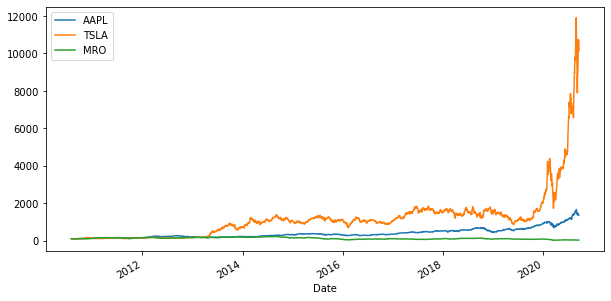

In [114]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [115]:
log_returns = np.log(pf_data/pf_data.shift(1))

In [116]:
log_returns

,AAPL,TSLA,MRO
Date,,,
2010-08-02,NaN,NaN,NaN
2010-08-03,0.000305,0.048061,-0.003800
2010-08-04,0.004001,-0.031940,0.015977
2010-08-05,-0.004879,-0.038844,0.008037
2010-08-06,-0.006171,-0.042964,-0.017011
...,...,...,...
2020-09-14,0.029559,0.118522,-0.015784
2020-09-15,0.001559,0.069365,-0.013730
2020-09-16,-0.029958,-0.017947,0.049448


In [117]:
log_returns.mean() * 250

AAPL    0.255472
TSLA    0.457505
MRO    -0.122804
dtype: float64

In [118]:
log_returns.cov() * 250

,AAPL,TSLA,MRO
AAPL,0.077652,0.048613,0.043350
TSLA,0.048613,0.304130,0.065680
MRO,0.043350,0.065680,0.237867


In [119]:
log_returns.corr()

,AAPL,TSLA,MRO
AAPL,1.000000,0.316333,0.318970
TSLA,0.316333,1.000000,0.244196
MRO,0.318970,0.244196,1.000000


In [120]:
num_assets= len(assets)

In [121]:
num_assets

3

In [122]:
arr = np.random.random(3)
arr

array([0.70979053, 0.78848973, 0.48460414])

In [123]:
arr[0] + arr[1] + arr[2]

1.9828843967202683

In [124]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.78724486, 0.19507121, 0.01768393])

In [125]:
weights[0] + weights[1] + weights[2]

1.0

In [126]:
np.sum(weights * log_returns.mean()) * 250

0.28819329495149243

In [127]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.07636330258895355

In [128]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.27633910796149275

In [129]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250, weights))))
    

In [130]:
pfolio_returns, pfolio_volatilities

([0.1280799388435654,
  0.040015874175393776,
  0.21517028717993297,
  0.1435100938913625,
  0.30546571866989863,
  0.14130517122670078,
  0.3367683335372369,
  0.10518416023087815,
  0.2609044388575972,
  0.17001598986498942,
  0.21610047832376997,
  0.15775882129261673,
  0.4379763835123532,
  0.019858407521994623,
  0.11635220156273558,
  0.1050433766614262,
  0.40783872104363095,
  0.39071586467465147,
  0.07657478680290217,
  0.18845842969571713,
  0.15704859084859557,
  0.2581773680443047,
  0.22964343514441665,
  0.055287333214490586,
  0.1449718682876153,
  0.33725817284660187,
  0.22352607079217962,
  0.17023387147799215,
  0.26796211900919126,
  0.11846776325936113,
  0.1174195315977754,
  0.08229286441033117,
  0.14245683204701,
  0.22355317347030873,
  0.17691818396367184,
  0.20545393851871396,
  0.20767910147519505,
  0.37338109826496857,
  0.3365738136206517,
  0.199109094013582,
  0.09892572864970593,
  0.2727725112852707,
  0.20481912575543101,
  0.1199734832214642,
  

In [131]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()* 250, weights))))
    
pfolio_returns =np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.20960938,  0.29593405,  0.28070703,  0.33646977,  0.18671266,
         0.13461366, -0.01273145,  0.28210961,  0.15960773,  0.21789698,
         0.19758987,  0.2941526 ,  0.10374753,  0.06481185,  0.24520578,
         0.31669925,  0.24365761,  0.06978238,  0.20085838,  0.27408111,
         0.12923996,  0.16977751,  0.04309403,  0.15652073,  0.05930234,
         0.31153893,  0.10213222,  0.1217401 ,  0.15550667,  0.19690441,
         0.19219014,  0.17002013,  0.16188373,  0.30989464,  0.26091113,
         0.1968379 ,  0.20398198,  0.16674236,  0.36132635, -0.02437892,
         0.20672846,  0.27358419,  0.17114111,  0.12159959,  0.05864201,
         0.27028844,  0.25698928,  0.14750595,  0.16637047,  0.0677504 ,
         0.21775364,  0.21034926,  0.23203488,  0.24816591,  0.33554304,
         0.19237706,  0.33824846,  0.32518512,  0.33507777,  0.33967454,
         0.26794521,  0.1764194 ,  0.33184232,  0.0403873 ,  0.33307942,
         0.07662943,  0.34852583,  0.19679422,  0.0

In [132]:
portfolios = pd.DataFrame({'Return': pfolio_returns,'Volatility': pfolio_volatilities})

In [133]:
portfolios.head()

,Return,Volatility
0,0.209609,0.297693
1,0.295934,0.302757
2,0.280707,0.329784
3,0.336470,0.394322
4,0.186713,0.390846


In [134]:
portfolios.tail()

,Return,Volatility
995,0.130647,0.320038
996,0.026714,0.355968
997,0.144857,0.281367
998,0.321057,0.345755
999,0.126510,0.322550


Text(0, 0.5, 'Expected Return')

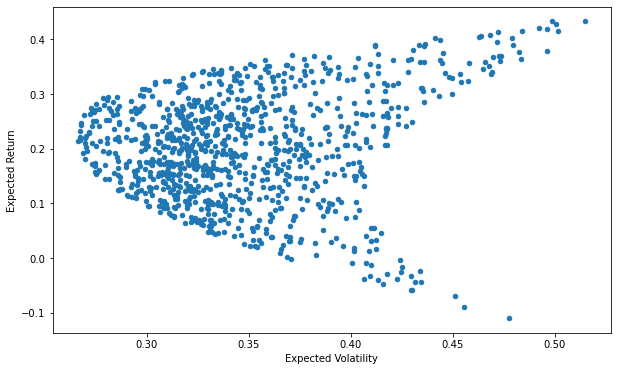

In [135]:
portfolios.plot(x='Volatility', y='Return', kind = 'scatter', figsize = (10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')